# Postdam PM2.5 Deep Learning Forecasting 

* Between 2013 and 2023, data collected by DEBB021 was used.
* To increase the accuracy of PM2.5 data estimation, NO2, O3, SO2, PM10 pollutant gas data accepted by the EEA was added.


In [2]:
#pip install tensorflow==2.15.0

In [3]:
#pip install keras-tuner==1.4.6 

In [4]:
# pip list

In [11]:
# imports
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np, pandas as pd

In [12]:
import model_base as mb
import deep_learning as dl

# oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

## Data Exploration

* Load Data


In [13]:
df_hourly, df_daily, df_weekly, df_monthly = mb.read_date_freq()

# Artificial Neural Network (ANN)

An Artificial Neural Network (ANN) is a computational model based on the structure and functions of biological neural networks. Information flows through networks of interconnected nodes, or neurons, each processing input and passing their output to the next layer. These networks are capable of learning complex patterns using algorithms that adjust connections between neurons based on the input data.

ANNs consist of input, hidden, and output layers. The hidden layers can perform nonlinear transformations on the inputs, allowing ANNs to model complex relationships. They're applied in various fields like image and speech recognition, natural language processing, and predictive analytics.

Comparatively, a Recurrent Neural Network (RNN) is specialized for processing sequences, capturing temporal dependencies by using loops within the network. However, standard RNNs struggle with long-term dependencies due to issues like vanishing gradients.

Long Short-Term Memory (LSTM) networks are a type of RNN designed to overcome this limitation. They include mechanisms called gates that regulate the flow of information and allow the network to retain or discard data over long sequences, making them more effective for tasks like time series analysis and language modeling.

Convolutional Neural Networks (CNNs) are another specialized kind of ANN designed for grid-like data, such as images. CNNs employ filters to perform convolution operations that capture spatial hierarchies and features, making them powerful for image and video recognition tasks.

Each type of network—ANN, RNN, LSTM, and CNN—serves different purposes and excels in different applications, from the general pattern recognition of ANNs to the nuanced temporal or spatial data handling in RNNs, LSTMs, and CNNs, respectively.

In [14]:
#dl.tune_and_evaluate(df)

# LSTM


{'learning_rate': 0.0004489034857354316, 'num_layers': 3, 'units': [320, 32, 32], 'activations': ['relu', 'relu', 'relu'], 'dropout': False}
Epoch 1/10
1643/1643 [==============================] - ETA: 0s - loss: 54.4341 - mean_absolute_error: 4.7800INFO:tensorflow:Assets written to: modelH/assets


INFO:tensorflow:Assets written to: modelH/assets


1643/1643 [==============================] - 64s 38ms/step - loss: 54.4341 - mean_absolute_error: 4.7800 - val_loss: 14.7177 - val_mean_absolute_error: 2.5015
Epoch 2/10
1643/1643 [==============================] - 60s 37ms/step - loss: 22.2879 - mean_absolute_error: 3.1674 - val_loss: 15.6585 - val_mean_absolute_error: 2.8199
Epoch 3/10
1643/1643 [==============================] - ETA: 0s - loss: 21.6676 - mean_absolute_error: 3.1033INFO:tensorflow:Assets written to: modelH/assets


INFO:tensorflow:Assets written to: modelH/assets


1643/1643 [==============================] - 61s 37ms/step - loss: 21.6676 - mean_absolute_error: 3.1033 - val_loss: 13.4758 - val_mean_absolute_error: 2.3330
Epoch 4/10
1643/1643 [==============================] - 60s 37ms/step - loss: 20.8361 - mean_absolute_error: 3.0108 - val_loss: 14.0251 - val_mean_absolute_error: 2.3495
Epoch 5/10
1643/1643 [==============================] - 60s 36ms/step - loss: 20.4876 - mean_absolute_error: 2.9765 - val_loss: 14.1690 - val_mean_absolute_error: 2.3701
Epoch 6/10
1643/1643 [==============================] - ETA: 0s - loss: 20.2391 - mean_absolute_error: 2.9504INFO:tensorflow:Assets written to: modelH/assets


INFO:tensorflow:Assets written to: modelH/assets


1643/1643 [==============================] - 61s 37ms/step - loss: 20.2391 - mean_absolute_error: 2.9504 - val_loss: 13.1304 - val_mean_absolute_error: 2.2896
Epoch 7/10
1642/1643 [============================>.] - ETA: 0s - loss: 19.7525 - mean_absolute_error: 2.9013INFO:tensorflow:Assets written to: modelH/assets


INFO:tensorflow:Assets written to: modelH/assets


1643/1643 [==============================] - 61s 37ms/step - loss: 19.7488 - mean_absolute_error: 2.9012 - val_loss: 13.0989 - val_mean_absolute_error: 2.2503
Epoch 8/10
1643/1643 [==============================] - 60s 36ms/step - loss: 19.4512 - mean_absolute_error: 2.8845 - val_loss: 13.2566 - val_mean_absolute_error: 2.2651
Epoch 9/10
1642/1643 [============================>.] - ETA: 0s - loss: 19.2464 - mean_absolute_error: 2.8644INFO:tensorflow:Assets written to: modelH/assets


INFO:tensorflow:Assets written to: modelH/assets


1643/1643 [==============================] - 61s 37ms/step - loss: 19.2409 - mean_absolute_error: 2.8640 - val_loss: 13.0756 - val_mean_absolute_error: 2.3332
Epoch 10/10
1643/1643 [==============================] - ETA: 0s - loss: 19.1223 - mean_absolute_error: 2.8540INFO:tensorflow:Assets written to: modelH/assets


INFO:tensorflow:Assets written to: modelH/assets


548/548 [==============================] - 6s 11ms/step
MAE: 2.2985
MSE: 12.8690
RMSE: 3.5873
MAPE: 0.1769
MASE: 0.8559960910059873
548/548 [==============================] - 6s 12ms/step
MAE: 2.1636
MSE: 12.2680
RMSE: 3.5026
MAPE: 0.1648
MASE: 0.8740868349521574


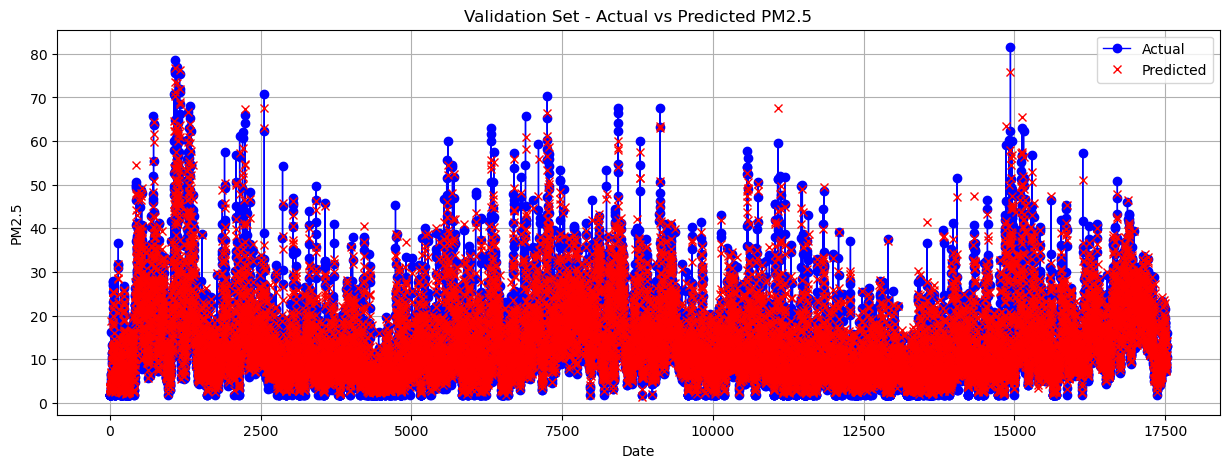

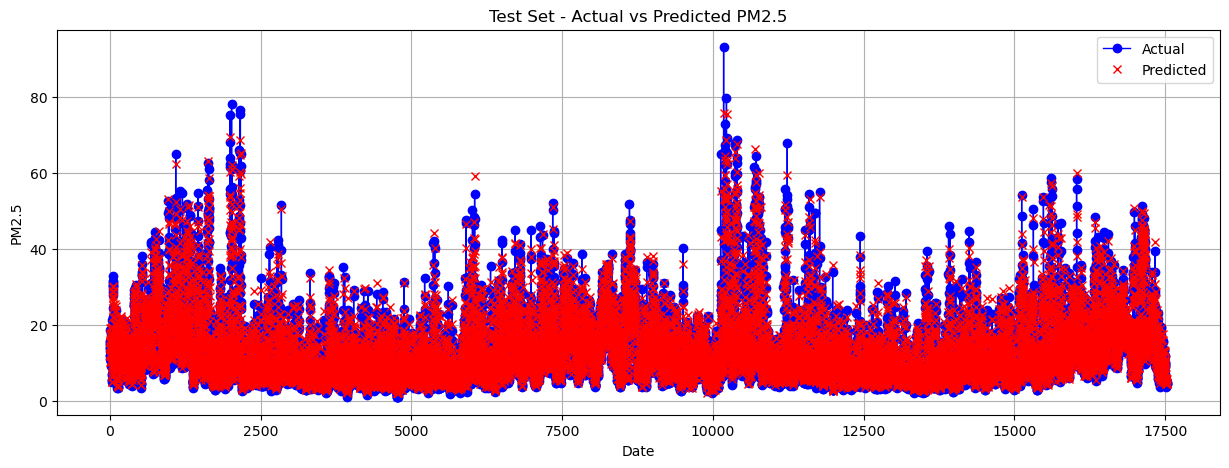

In [15]:
dl.train_and_evaluate(df_hourly)
